# Part 2 - Multivariate Plots

The previous lesson got too big, so we're moving the multivariate plots here. The basic versions of plots can be extended to include some interesting things!

Since this is a new notebook, we have to import and clean the data again.

In [2]:
# Load the data into this notebook
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

so = pd.read_csv("../data/stackOverflowSurveyResults.csv")

# Here are all of the column names
# print(so.columns) # Two useless columns: 
so = so.drop(columns = ["Unnamed: 0", "X"])

# Make some of the categories follow specific order
so["JobSat"] = so["JobSat"].astype("category")
JobSatOrder = ["Very dissatisfied", "Slightly dissatisfied",
    "Neither satisfied nor dissatisfied", "Slightly satisfied",
    "Very satisfied"]
so["JobSat"].cat.reorder_categories(JobSatOrder, inplace = True)

so["MgrIdiot"] = so["MgrIdiot"].astype("category")
MgrIdiotOrder = ["Not at all confident",
    "Somewhat confident", "Very confident", "I don't have a manager"]
so["MgrIdiot"].cat.reorder_categories(MgrIdiotOrder, inplace = True)

In the previous lesson, we saw a histogram and a density plot on the same axis. In general, I like histograms better because they're easier to interpret (you're counting values in a range) whereas density plots have a hard-to-decifer level of smoothing to make it look pretty. However, density plots are fantastic for comparing distributions.

The plot below changes the colour scheme up a little bit. It shows the compensation, split up based on how confident the respondent is in their manage. 

I used a sequential colour scheme here since the levels of the variable are ordinal, so dark to light indicates more confidence in their manager, with "no manager" being grey.

In the same block of code, I've made (but commented out) other plots that you can look at. Feel free to add your own and see what you get!

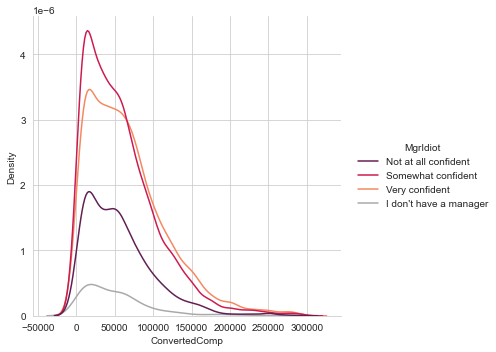

In [3]:
#sns.displot(data = so[so.ConvertedComp < 300000], x = "ConvertedComp", hue = "Extraversion", kind = "kde")
#sns.displot(data = so[so.ConvertedComp < 300000], x = "ConvertedComp", hue = "Python", kind = "kde")

# The following command creates a better colour palette for JobSat
#sns.displot(data = so[so.ConvertedComp < 300000], x = "ConvertedComp", hue = "JobSat", kind = "kde", palette = "rocket")

# Modifying the "rocket" colour palette
rocket_Mgr = sns.color_palette("rocket", n_colors = len(set(so.MgrIdiot)) - 2) # minus 2 since I'm adding grey
rocket_Mgr = rocket_Mgr.as_hex() # I had to look this up on StackOverflow
# Because of the way I ordered the data, "No Manager" is last. Append adds grey as the last colour
rocket_Mgr.append("#A9A9A9") # I had to Google this.
#help(sns.color_palette)
#print(rocket_Mgr)
sns.displot(data = so[so.ConvertedComp < 300000], x = "ConvertedComp", hue = "MgrIdiot", kind = "kde", palette = rocket_Mgr)
plt.show()

The data contain information on the Education Level of the respondents. The plot below shows their age, separated by education level. I used density plots for comparison of the different education levels. 

As a quick aside, the default colour palette in seaborn is not bad, but not perfect. In the plot below, the colours are all a similar brightness, which is good, but there are two purples that are a bit too close. The colours are not colourblind-friendly, and they would not show up well in black-and-white printouts. Throughout this notebook, I'll be changing up the palettes to demonstrate the options. 

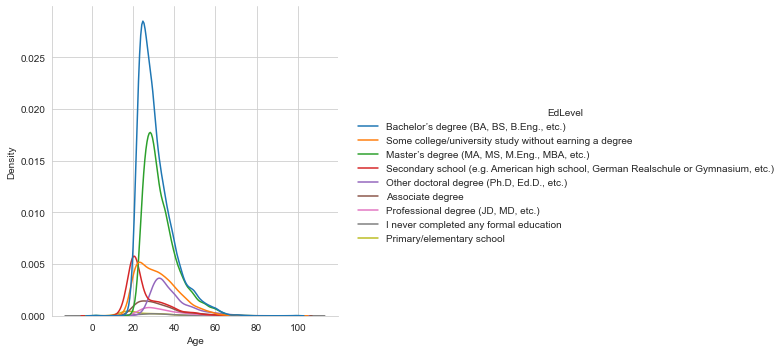

In [4]:
#help(sns.displot) # un-comment to see the help file
# Uncomment to see the other plots - during data vis, expect to make a lot of plots that won't make it into any papers.
sns.displot(data = so, x = "Age", hue = "EdLevel", kind = "kde")
#sns.displot(data = so, x = "Age", hue = "Student", kind = "kde")
#sns.displot(data = so, x = "Age", hue = "Python", kind = "kde")
plt.show()

Side-by-side bar plots aren't ground-breaking, but they're very useful tools. In the code below, see how your attention changes when you switch `hue` and `x` so that the grouping is done differently.

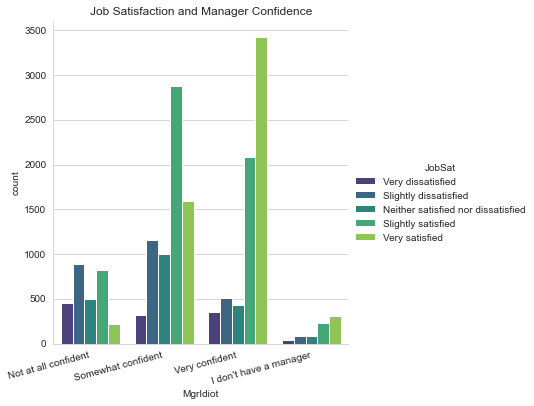

In [5]:
sns.catplot(data = so, kind = "count", hue = "JobSat", x = "MgrIdiot",
    order = MgrIdiotOrder, palette = "viridis")
plt.xticks(rotation = 15, horizontalalignment = "right") # Rotate x labels so they don't overlap
plt.title("Job Satisfaction and Manager Confidence")
plt.show()

The plot below takes the boxplots from the previous lesson and splits each box based on MgrIdiot, and now the colours allow for quick comparison by eye.

Again, try switching the order to see how it frames your attention. Also, see what happens when you switch this to a violin plot (similar to histogram versus density plots, a simpler version makes comparison easier).

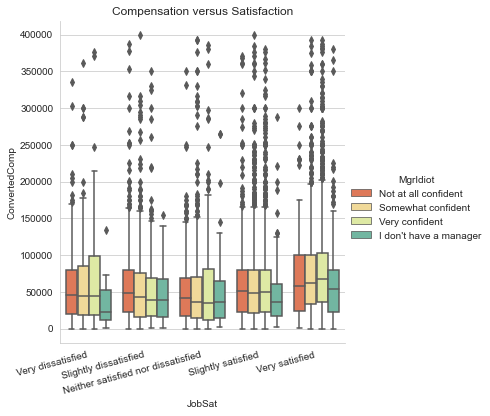

In [7]:
sns.catplot(data = so[so.ConvertedComp < 400000], kind = "box", x = "JobSat", y = "ConvertedComp", hue = "MgrIdiot", palette = "Spectral")
plt.xticks(rotation = 15, horizontalalignment = "right") # Rotate x labels so they don't overlap
plt.title("Compensation versus Satisfaction")
plt.show()

One major takeaway message: eople with managers seem to make more, and those without a manager who aren't satisfied with their job should probably find a more lucrative job.

The plot below shows how to change the colour of points in a scatterplot. In this case, the plot does not show any new insights.

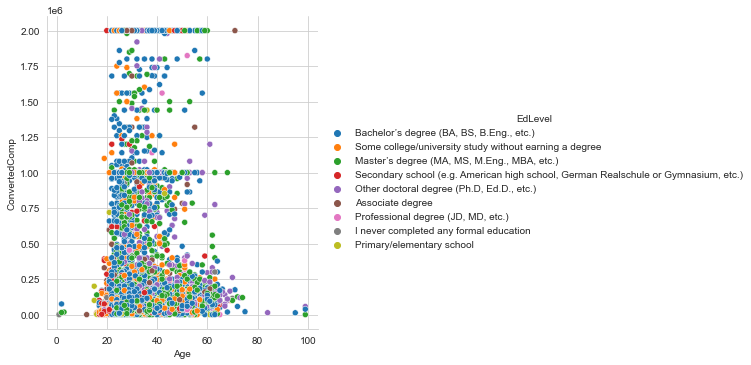

In [6]:
sns.relplot(data = so, x = "Age", y = "ConvertedComp", hue = "EdLevel")
plt.show()

# The End

In this lecture, we pushed the limits of what a single plot can show you. I wouldn't want to make any of these too much more complicated or colourful, and some of them are simply jumping-off points for what sorts of models we would fit (in other words, many of these would never make it to print). 